<a href="https://colab.research.google.com/github/AlexGordeev1661/British-Airways-DataAnalysis/blob/main/BritishAirways_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

#**Data Extraction**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

#Create a cycle to iterate through pages:
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data and collect data from HTML page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Excellent flight. Super cr...
1,✅ Trip Verified | Flight left and arrived on ...
2,Not Verified | My friend and I were helped ...
3,✅ Trip Verified | As a regular flier in this r...
4,✅ Trip Verified | I've been a regular travel...


In [4]:
df.to_csv("/BA_reviews.csv")
df

,reviews
0,✅ Trip Verified | Excellent flight. Super cr...
1,✅ Trip Verified | Flight left and arrived on ...
2,Not Verified | My friend and I were helped ...
3,✅ Trip Verified | As a regular flier in this r...
4,✅ Trip Verified | I've been a regular travel...
...,...
995,✅ Trip Verified | London Heathrow to Seychelle...
996,✅ Trip Verified | Edinburgh to London Heathro...
997,Not Verified | Amman to London. This is a nice...
998,✅ Trip Verified | London to Athens. British Ai...


In [5]:
#Now, we need to extract text of the review from each column to further run a sentiment analysis
df.reviews=df.reviews.str.split('|', expand=True)[1]
df.reviews

,reviews
0,Excellent flight. Super crew on BA99 on Aug...
1,Flight left and arrived on time. Very good f...
2,My friend and I were helped and we would l...
3,As a regular flier in this route my previous ...
4,I've been a regular traveller with BA for 1...
...,...
995,London Heathrow to Seychelles. Really great f...
996,Edinburgh to London Heathrow. I have no prob...
997,"Amman to London. This is a nice aircraft, wit..."
998,London to Athens. British Airways is a glorif...


#**Data Cleaning**

In [6]:
import re

#Removing any punctuation marks and etc.
def cleaning(text):
  text = re.sub('[^A-Za-z]+', ' ', str(text))
  return text

df['cleaned reviews'] = df['reviews'].apply(cleaning)
df.head()


,reviews,cleaned reviews
0,Excellent flight. Super crew on BA99 on Aug...,Excellent flight Super crew on BA on August F...
1,Flight left and arrived on time. Very good f...,Flight left and arrived on time Very good foo...
2,My friend and I were helped and we would l...,My friend and I were helped and we would like...
3,As a regular flier in this route my previous ...,As a regular flier in this route my previous ...
4,I've been a regular traveller with BA for 1...,I ve been a regular traveller with BA for yea...


#**Tokenisation**

In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

stop_words = set(stopwords.words('english'))

#Creating a function for word tokenisation
def process_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [word for word, tag in tagged_tokens if word.lower() not in stop_words and word.isalpha()]
    return filtered_tokens

df['tokenized_reviews'] = df['cleaned reviews'].apply(process_text)
df


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,cleaned reviews,tokenized_reviews
0,Excellent flight. Super crew on BA99 on Aug...,Excellent flight Super crew on BA on August F...,"[Excellent, flight, Super, crew, BA, August, F..."
1,Flight left and arrived on time. Very good f...,Flight left and arrived on time Very good foo...,"[Flight, left, arrived, time, good, food, serv..."
2,My friend and I were helped and we would l...,My friend and I were helped and we would like...,"[friend, helped, would, like, say, much, huge,..."
3,As a regular flier in this route my previous ...,As a regular flier in this route my previous ...,"[regular, flier, route, previous, experience, ..."
4,I've been a regular traveller with BA for 1...,I ve been a regular traveller with BA for yea...,"[regular, traveller, BA, years, complete, tran..."
...,...,...,...
995,London Heathrow to Seychelles. Really great f...,London Heathrow to Seychelles Really great fl...,"[London, Heathrow, Seychelles, Really, great, ..."
996,Edinburgh to London Heathrow. I have no prob...,Edinburgh to London Heathrow I have no proble...,"[Edinburgh, London, Heathrow, problems, flight..."
997,"Amman to London. This is a nice aircraft, wit...",Amman to London This is a nice aircraft with ...,"[Amman, London, nice, aircraft, comfortable, s..."
998,London to Athens. British Airways is a glorif...,London to Athens British Airways is a glorifi...,"[London, Athens, British, Airways, glorified, ..."


#**Lemmatisation**


In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

#Creating a function for word lemmatisation
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmatized_tokens

df['lemmatized_reviews'] = df['tokenized_reviews'].apply(lemmatize_tokens)
df


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,reviews,cleaned reviews,tokenized_reviews,lemmatized_reviews
0,Excellent flight. Super crew on BA99 on Aug...,Excellent flight Super crew on BA on August F...,"[Excellent, flight, Super, crew, BA, August, F...","[Excellent, flight, Super, crew, BA, August, F..."
1,Flight left and arrived on time. Very good f...,Flight left and arrived on time Very good foo...,"[Flight, left, arrived, time, good, food, serv...","[Flight, left, arrive, time, good, food, serve..."
2,My friend and I were helped and we would l...,My friend and I were helped and we would like...,"[friend, helped, would, like, say, much, huge,...","[friend, help, would, like, say, much, huge, h..."
3,As a regular flier in this route my previous ...,As a regular flier in this route my previous ...,"[regular, flier, route, previous, experience, ...","[regular, flier, route, previous, experience, ..."
4,I've been a regular traveller with BA for 1...,I ve been a regular traveller with BA for yea...,"[regular, traveller, BA, years, complete, tran...","[regular, traveller, BA, year, complete, trans..."
...,...,...,...,...
995,London Heathrow to Seychelles. Really great f...,London Heathrow to Seychelles Really great fl...,"[London, Heathrow, Seychelles, Really, great, ...","[London, Heathrow, Seychelles, Really, great, ..."
996,Edinburgh to London Heathrow. I have no prob...,Edinburgh to London Heathrow I have no proble...,"[Edinburgh, London, Heathrow, problems, flight...","[Edinburgh, London, Heathrow, problem, flight,..."
997,"Amman to London. This is a nice aircraft, wit...",Amman to London This is a nice aircraft with ...,"[Amman, London, nice, aircraft, comfortable, s...","[Amman, London, nice, aircraft, comfortable, s..."
998,London to Athens. British Airways is a glorif...,London to Athens British Airways is a glorifi...,"[London, Athens, British, Airways, glorified, ...","[London, Athens, British, Airways, glorify, bu..."


In [11]:
df[['reviews', 'lemmatized_reviews']]

,reviews,lemmatized_reviews
0,Excellent flight. Super crew on BA99 on Aug...,"[Excellent, flight, Super, crew, BA, August, F..."
1,Flight left and arrived on time. Very good f...,"[Flight, left, arrive, time, good, food, serve..."
2,My friend and I were helped and we would l...,"[friend, help, would, like, say, much, huge, h..."
3,As a regular flier in this route my previous ...,"[regular, flier, route, previous, experience, ..."
4,I've been a regular traveller with BA for 1...,"[regular, traveller, BA, year, complete, trans..."
...,...,...
995,London Heathrow to Seychelles. Really great f...,"[London, Heathrow, Seychelles, Really, great, ..."
996,Edinburgh to London Heathrow. I have no prob...,"[Edinburgh, London, Heathrow, problem, flight,..."
997,"Amman to London. This is a nice aircraft, wit...","[Amman, London, nice, aircraft, comfortable, s..."
998,London to Athens. British Airways is a glorif...,"[London, Athens, British, Airways, glorify, bu..."


#**SENTIMENT ANALYSIS**

In [12]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [19]:
#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(tokens):
    text = ' '.join(tokens)
    # Get polarity scores for the text
    scores = analyzer.polarity_scores(text)
    # Check if 'compound' key exists, if not, check for 'compound_score'
    compound_score = scores.get('compound', scores.get('compound_score', 0))
    return compound_score  # Return the compound score or 0 if not found

df['sentiment_scores'] = df['lemmatized_reviews'].apply(analyze_sentiment)

#Sentiment ANalysis evaluation function
def vader_analysis(compound_score):
  if compound_score >= 0.5:
    return 'Positive'
  elif compound_score <= -0.5:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment'] = df['sentiment_scores'].apply(vader_analysis)
df[['reviews', 'sentiment_scores', 'Sentiment']]

,reviews,sentiment_scores,Sentiment
0,Excellent flight. Super crew on BA99 on Aug...,0.9712,Positive
1,Flight left and arrived on time. Very good f...,0.9545,Positive
2,My friend and I were helped and we would l...,0.9631,Positive
3,As a regular flier in this route my previous ...,0.3182,Neutral
4,I've been a regular traveller with BA for 1...,0.3182,Neutral
...,...,...,...
995,London Heathrow to Seychelles. Really great f...,0.9674,Positive
996,Edinburgh to London Heathrow. I have no prob...,-0.7717,Negative
997,"Amman to London. This is a nice aircraft, wit...",0.8402,Positive
998,London to Athens. British Airways is a glorif...,0.7269,Positive


In [20]:

import pandas as pd

#Average Sentiment calculation
average_sentiment = df['sentiment_scores'].mean()
print(f"The average sentiment score is: {average_sentiment}")


The average sentiment score is: 0.14851080000000003


In [21]:
vader_values = df['Sentiment'].value_counts()
vader_values

,count
Sentiment,
Positive,455
Negative,317
Neutral,228


([<matplotlib.patches.Wedge at 0x7bf8a90e1ee0>,
 [Text(0.15499124041064433, 1.0890260398153802, 'Positive'),
  Text(-0.8319414208650632, -0.719634262837047, 'Negative'),
  Text(1.0182397675855905, -0.8863903066410659, 'Neutral')],
 [Text(0.08454067658762417, 0.5940142035356618, '45.5%'),
  Text(-0.45378622956276166, -0.3925277797292983, '31.7%'),
  Text(0.6411139277390755, -0.5580976004777081, '22.8%')])

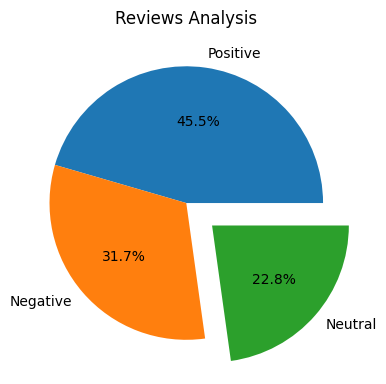

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_values.values, labels = vader_values.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)